In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [3]:
df=pd.read_csv("data/bluebook-for-bulldozers 2/TrainAndValid.csv",
              low_memory=False)

In [4]:
df.head()


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [6]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


In [7]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

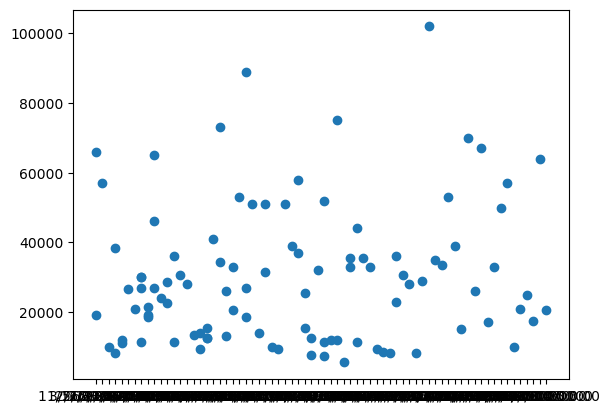

In [8]:
fig,ax=plt.subplots()
ax.scatter(df.saledate[:100],df.SalePrice[:100])

<Axes: ylabel='Frequency'>

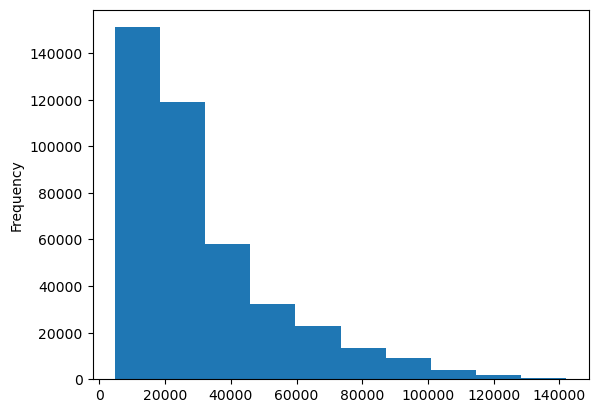

In [9]:
df.SalePrice.plot.hist()

**We have dates in our columns so we have to tackle those dates using pandas**
**using `parse_dates`**

In [10]:
df=pd.read_csv("data/bluebook-for-bulldozers 2/TrainAndValid.csv",
              low_memory=False,
              parse_dates=["saledate"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

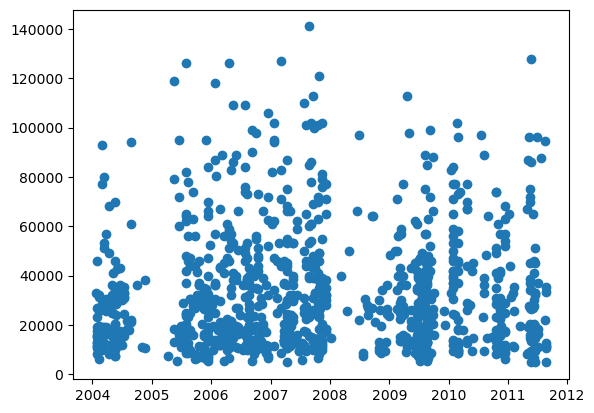

In [11]:
fig,ax=plt.subplots()
ax.scatter(df.saledate[:1000],df.SalePrice[:1000])

In [12]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**SORTING DATAFRAME BY SALEDATES**

In [13]:
df.sort_values(by=["saledate"],inplace=True,ascending=True)
df.saledate[:1000]

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
            ...    
54344    1989-03-16
143206   1989-03-16
93144    1989-03-16
86917    1989-03-16
115938   1989-03-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

In [14]:
df_temp=df.copy()

In [15]:
df_temp["saleyear"]=df_temp.saledate.dt.year
df_temp["salemonth"]=df_temp.saledate.dt.month
df_temp["saleday"]=df_temp.saledate.dt.day
df_temp["saledayofweek"]=df_temp.saledate.dt.dayofweek

In [16]:
df_temp.drop("saledate",axis=1,inplace=True)

In [17]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

##CONVERTING DATA INTO CATEGORY

In [19]:
df_temp.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                 object
Blade_Extension             

for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [20]:
for label,content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [21]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 56 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [22]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [23]:
df_temp.to_csv("data/bluebook-for-bulldozers 2/train.csv")

**FILLING MISSING NUMERIC VALUE**

In [24]:
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print (label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleyear
salemonth
saleday
saledayofweek


In [25]:
for label,content  in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [26]:
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #creating a boolean column value for missing value detection
            df_temp[label+"_is_missing"]=pd.isnull(content)
            #filling missing valuess
            df_temp[label]=content.fillna(content.median())
#median is more robust than mean

In [27]:
df_temp.dtypes

SalesID                                  int64
SalePrice                              float64
MachineID                                int64
ModelID                                  int64
datasource                               int64
auctioneerID                           float64
YearMade                                 int64
MachineHoursCurrentMeter               float64
UsageBand                               object
fiModelDesc                             object
fiBaseModel                             object
fiSecondaryDesc                         object
fiModelSeries                           object
fiModelDescriptor                       object
ProductSize                             object
fiProductClassDesc                      object
state                                   object
ProductGroup                            object
ProductGroupDesc                        object
Drive_System                            object
Enclosure                               object
Forks        

In [28]:
for label,content  in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [29]:
df_temp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

In [30]:
df_temp.dtypes

SalesID                                  int64
SalePrice                              float64
MachineID                                int64
ModelID                                  int64
datasource                               int64
auctioneerID                           float64
YearMade                                 int64
MachineHoursCurrentMeter               float64
UsageBand                               object
fiModelDesc                             object
fiBaseModel                             object
fiSecondaryDesc                         object
fiModelSeries                           object
fiModelDescriptor                       object
ProductSize                             object
fiProductClassDesc                      object
state                                   object
ProductGroup                            object
ProductGroupDesc                        object
Drive_System                            object
Enclosure                               object
Forks        

**CONVERTING AND FILLING CATEGORICAL DATA INTO NUMBERS**

In [31]:
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # # if pd.isnull(content).sum():
         print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [67]:
pd.Categorical(df_temp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [33]:
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        ##creating binary column
        df_temp[label+"_is_missing"]=pd.isnull(content)
        #filling missing values
        df_temp[label]=pd.Categorical(content).codes +1

##we are adding 1 to codes beacause for every missing value code is -1

In [34]:
df_temp.isna().sum()


SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 102, dtype: int64

In [35]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [36]:
pd.Categorical(df_temp["UsageBand"]).codes

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [37]:
%%time
from sklearn.ensemble import RandomForestRegressor
model =RandomForestRegressor(n_jobs=2,
                            random_state=45)
x=df_temp.drop("SalePrice",axis=1)
y=df_temp["SalePrice"]
model.fit(x,y)

CPU times: user 18min 46s, sys: 18.9 s, total: 19min 5s
Wall time: 12min 40s


RandomForestRegressor(n_jobs=2, random_state=45)

In [38]:
df_valid=df_temp[df_temp["saleyear"]==2012]
df_train=df_temp[df_temp["saleyear"]!=2012]

In [39]:
##train and test data
x_train=df_train.drop("SalePrice",axis=1)
y_train=df_train["SalePrice"]
x_valid=df_valid.drop("SalePrice",axis=1)
y_valid=df_valid["SalePrice"]

**BUILDING AN  EVALUATION FUNCTION**

In [57]:
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score
def eval_rmsle(y_test,y_preds):
    return np.sqrt(mean_squared_log_error(y_test,y_preds))
def show_scores(model):
    train_preds=model.predict(x_train)
    valid_preds=model.predict(x_valid)
    scores={"TRAINNIG RMSLE": eval_rmsle(y_train,train_preds),
    "VALID RMSLE":eval_rmsle(y_valid,valid_preds),
    "TRAINING MAE":mean_absolute_error(y_train,train_preds),
    "VALID MAE":mean_absolute_error(y_valid,valid_preds),
    "TRAINING R^2 ":r2_score(y_train,train_preds),
    "VALID R^2":r2_score(y_valid,valid_preds)}
    return scores

In [47]:
x_train.shape

(401125, 101)

In [45]:

reg=RandomForestRegressor(n_jobs=-1,
                         max_samples=10000,
                         random_state=42)
reg

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [48]:
%%time
reg.fit(x_train,y_train)

CPU times: user 47.4 s, sys: 1.11 s, total: 48.5 s
Wall time: 19.6 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [49]:
show_scores(reg)

{'TRAINNIG RMSLE': 0.25710686763781876,
 'VALID RMSLE': 7130.6377257409495,
 ' TRAINING MAE': 5547.497373162978,
 'TRAINING R^2 ': 0.8612599633328437,
 'VALID R^2': 0.8337686572853422}

**HYPERPARAMETER TUNING**

In [53]:
%%time
from sklearn.model_selection import RandomizedSearchCV
grid={"n_estimators": np.arange(10,100,10),
      "max_depth":[None ,3,5,10],
      "min_samples_split":np.arange(2,20,2),
      "min_samples_leaf":np.arange(2,10,2),
      "max_features":["log","sqrt","auto"],
      "max_samples":[10000,20000,30000]}
rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                  random_state=42),
                            param_distributions=grid,
                            n_iter=10,
                            cv=5)
rs_model.fit(x_train,y_train)

/Users/arpitsudhir/Desktop/heart-disease-project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/arpitsudhir/Desktop/heart-disease-project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/arpitsudhir/Desktop/heart-disease-project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': ['log', 'sqrt', 'auto'],
                                        'max_samples': [10000, 20000, 30000],
                                        'min_samples_leaf': array([2, 4, 6, 8]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])})

In [54]:
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 8,
 'min_samples_leaf': 8,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': None}

In [58]:
show_scores(rs_model)


{'TRAINNIG RMSLE': 0.35315541825509855,
 'VALID RMSLE': 0.3799689551276713,
 'TRAINING MAE': 7983.196111960329,
 'VALID MAE': 9450.76045198528,
 'TRAINING R^2 ': 0.7381874653903875,
 'VALID R^2': 0.7314643304715489}

In [59]:
show_scores(reg)

{'TRAINNIG RMSLE': 0.25710686763781876,
 'VALID RMSLE': 0.29069976075161047,
 'TRAINING MAE': 5547.497373162978,
 'VALID MAE': 7130.6377257409495,
 'TRAINING R^2 ': 0.8612599633328437,
 'VALID R^2': 0.8337686572853422}

**WORKING ON TEST DATA**

In [105]:
df_test=pd.read_csv("data/bluebook-for-bulldozers 2/Test.csv",
                    low_memory=False,
                    parse_dates=["saledate"])
df_test["auctioneerID_is_missing"]=False

In [106]:
def preprocess(df):
    df["saleyear"]=df.saledate.dt.year
    df["salemonth"]=df.saledate.dt.month
    df["saleday"]=df.saledate.dt.day
    df["saledayofweek"]=df.saledate.dt.dayofweek
    df.drop("saledate",axis=1,inplace=True)
    #filling numerice missing values with median
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                #creating a boolean column value for missing value detection
                df[label+"_is_missing"]=pd.isnull(content)
                #filling missing valuess
                df[label]=content.fillna(content.median())
    
    #filling categorical values 
    for label,content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"]=pd.isnull(content)
            df[label]=pd.Categorical(content).codes +1

    return df


In [107]:
df_test=preprocess(df_test)


In [108]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 101, dtype: int64

In [112]:
# Match column order from X_train to df_test (to predict on columns, they should be in the same order they were fit on)
df_test = df_test[x_train.columns]

In [114]:
test_preds=reg.predict(df_test)
# df_test.head()
test_preds

array([18896.5, 28710. , 53750. , ..., 13904. , 15350. , 23900. ])

In [115]:
df_preds=pd.DataFrame()
df_preds["SalesID"]=df_test["SalesID"]
df_preds["Price"]=test_preds
df_preds

,SalesID,Price
0,1227829,18896.5
1,1227844,28710.0
2,1227847,53750.0
3,1227848,82365.0
4,1227863,43935.0
...,...,...
12452,6643171,45775.0
12453,6643173,12142.5
12454,6643184,13904.0
12455,6643186,15350.0


In [116]:
df_preds.to_csv("data/test_preds.csv")

**FEATURE IMPORTANCE**

In [131]:
reg.feature_importances_

array([4.88564274e-02, 2.34877606e-02, 3.04592835e-02, 9.89993320e-04,
       6.23015436e-03, 2.52351551e-01, 4.42731504e-03, 1.58017394e-03,
       2.52366153e-02, 4.63656072e-02, 5.79979853e-02, 4.11557015e-03,
       5.92358736e-03, 2.16364909e-01, 3.12485305e-02, 1.22526858e-02,
       1.90077290e-03, 1.83446716e-03, 1.36632283e-03, 2.36298700e-02,
       7.43541886e-04, 2.34727828e-04, 1.53368311e-03, 2.16016078e-04,
       1.21535466e-03, 6.97133082e-05, 1.07807813e-03, 2.22946569e-02,
       4.24824789e-04, 8.33976638e-04, 3.62290848e-03, 1.86091683e-03,
       2.82032979e-03, 1.97225810e-03, 2.41508568e-03, 4.01024365e-03,
       1.53882972e-03, 1.66804447e-02, 3.20603747e-04, 1.55425680e-04,
       2.69576918e-04, 1.20812010e-03, 1.68757119e-03, 8.90823223e-04,
       7.39539732e-04, 9.12484301e-04, 1.31552436e-04, 2.73374334e-03,
       1.18100372e-03, 1.99169698e-04, 1.70988435e-04, 6.54892871e-02,
       1.09595348e-02, 1.37074166e-02, 6.95121179e-03, 4.71671746e-04,
      

In [133]:
def plot_feature(columns,importance,n=20):
    df=(pd.DataFrame({"Features":columns,
                      "Feature_importance":importance}).sort_values("Feature_importance",ascending=False).reset_index(drop=True))
    fig,ax=plt.subplots()
    ax.barh(df["Features"][:n],df["Feature_importance"][:n])
    ax.set_xlabel("features")
    ax.set_ylabel("feature_importance")
    
    # ax.title("FEATURE IMPORTANCE")




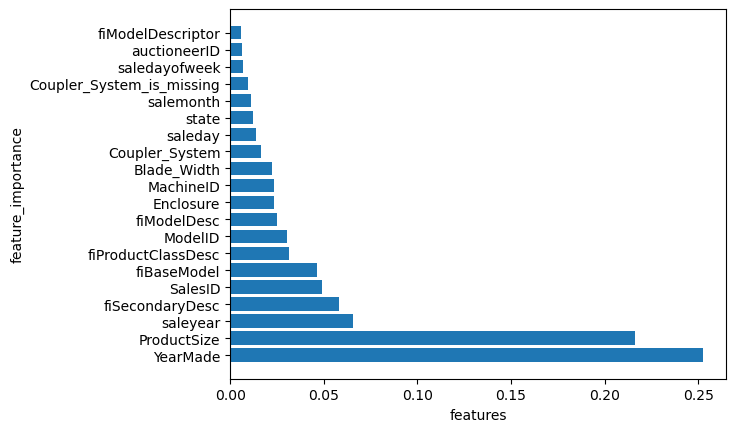

In [134]:
plot_feature(x_train.columns,reg.feature_importances_)